In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import weibull_min

from celavi.simple_model import Context

np.random.seed(0)

## Lifespan functions

In [8]:
lifespan_fns = {
    "nacelle": lambda: 30,
#     "blade": lambda: round(float(weibull_min.rvs(2, loc=0, scale=17, size=1))),
    "blade": lambda: round(float(weibull_min.rvs(0.75, loc=0, scale=17, size=1))),
    "foundation": lambda: 50,
    "tower": lambda: 50,
}

## Components of all the turbines

In [9]:
turbine = [
    {
        "kind": "blade",
        "xlat": 39.9106,
        "ylon": -105.2347,
        "year": 2000,
    },
    {
        "kind": "blade",
        "xlat": 39.9106,
        "ylon": -105.2347,
        "year": 2000,
    },
    {
        "kind": "blade",
        "xlat": 39.9106,
        "ylon": -105.2347,
        "year": 2000,
    },
    {
        "kind": "nacelle",
        "xlat": 39.9106,
        "ylon": -105.2347,
        "year": 2000,
    },
    {
        "kind": "tower",
        "xlat": 39.9106,
        "ylon": -105.2347,
        "year": 2000,
    },
    {
        "kind": "foundation",
        "xlat": 39.9106,
        "ylon": -105.2347,
        "year": 2000,
    },
]

components = pd.DataFrame(turbine * 1000)

## Load components into context and run it.

THen display the CDF of the blades in the landfill

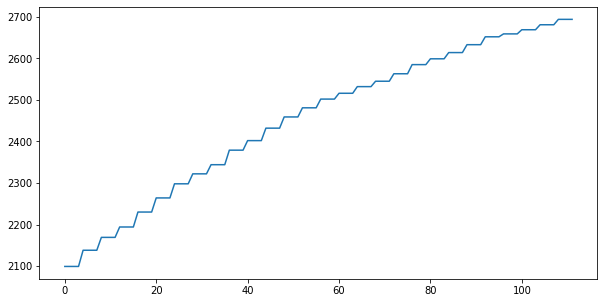

In [10]:
context = Context()
context.populate(components, lifespan_fns)
landfill_inventory = context.run()
ys = landfill_inventory.loc[160:, "blade"]
xs = np.arange(len(ys))
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
ax.plot(xs, ys)

In [5]:
len(ys)

112

## Make a plot of the empirical CDF

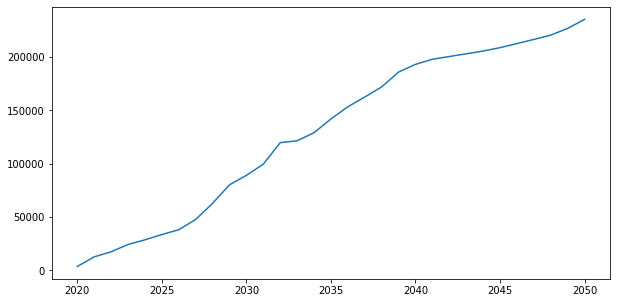

In [6]:
df = pd.read_csv("empirical_blades_retired_per_year.csv")
xs = df["Year"].values
ys = df["Blades.Retired.Per.Year"].values
ys = np.cumsum(ys)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
ax.plot(xs, ys)

In [7]:
len(ys)

31